## Описание работы

У нас есть, полученные из открытых источников данные о продажах игр, оценки пользователей и экспертов по различным платформам и жанрам компьютерных игр. Необходимо выявить закономерности, влияющие на успешность игры, что-бы спланировать рекламные компании на следующий год.
Для этого мы посмотрим как распределялась выручка от игр в разрезе, жанров, платформ и регионов. 
Создадим портрет пользователя каждого региона.
Проверим гипотезы равенства рейтингов различных платформ и жанров.

## импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy import stats as st
#from math import factorial
import math
import datetime
import calendar



df=pd.read_csv('/datasets/games.csv')

### знакомство с данными

In [2]:
df.info()
display(df.sample(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5136,Overlord: Dark Legend,Wii,2009.0,Action,0.11,0.22,0.00,0.04,68.0,7.9,T
13435,The Misadventures of Tron Bonne,PS,1999.0,Adventure,0.03,0.02,0.00,0.00,NaN,NaN,NaN
7365,SingStar Pop Edition,PS3,2009.0,Misc,0.00,0.18,0.00,0.03,NaN,NaN,NaN
2240,Disney Magical World,3DS,2013.0,Adventure,0.17,0.20,0.53,0.03,71.0,7.5,E
16567,Memories Off #5: Togireta Film,PSP,2009.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12529,Call of Duty 2,PC,2005.0,Shooter,0.00,0.05,0.00,0.01,86.0,8.4,T
4277,Dora The Explorer: Dora Saves the Snow Princess,DS,2008.0,Platform,0.26,0.15,0.00,0.03,NaN,NaN,NaN
13074,Winning Post 7 2010,PSP,2010.0,Sports,0.00,0.00,0.05,0.00,NaN,NaN,NaN
12527,Terminator 3: The Redemption,XB,2004.0,Shooter,0.05,0.01,0.00,0.00,66.0,8.6,T
3734,Popeye,2600,1982.0,Platform,0.50,0.03,0.00,0.01,NaN,NaN,NaN


In [3]:
print(np.sort(df.Year_of_Release.unique()))

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]


In [4]:
print(np.sort(df.Platform.unique()))

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


In [5]:
print(df.Genre.unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [6]:
print(np.sort(df.Critic_Score.unique()))

[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]


In [7]:
print(df.User_Score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [8]:
print(df.Rating.unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


### перевод имен столбцов в нижний регистр

In [9]:
df.columns = df.columns.str.lower()

### вычисление суммарных продаж

In [10]:
df['total_sales']=df.na_sales+df.eu_sales+df.jp_sales+df.other_sales

## проверка данных

### name

есть две строки с пустыми наименованиями, посмотрим на них

In [11]:
display(df[pd.isnull(df['name'])])   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Но поскольку наименование как таковое, нигде в анализе не участвует, а информация по продажам есть, то оставим как есть. Только заменим NaN на, например, tbd

In [12]:
#df.drop(df[df.index==659].index, inplace=True)
#df.drop(df[df.index==14244].index, inplace=True)
df[df.index==659].name='tbd'
df[df.index==14244].name='tbd'

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### user_score

поскольку critic_score имеет тип float64, и для корректного сравнения заменим тип столбца user_score на float64
значения tbd (данные нуждаются в уточнении) заменим на NAN. Это значение нельзя заменять на 0, т.к. замена на 0 приведет к падению рейтинга, а это не верно

In [13]:
df.replace({'user_score': {'tbd' : np.NaN}},inplace=True)
df.user_score=df.user_score.astype('float64')

### Year_of_Release

In [14]:
display(df[pd.isnull(df['year_of_release'])])   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<span style='color:blue '> 
269 строк, 1.6% от всех данных содержат пустое значение в годе. Столбец year_of_release является критичным для анализа, по нему будут производиться все группировки и строки с пустыми значениями соберуться в неинформативную группу. Поэтому я их удалю сразу. В реальности, при необходимости, имея наименование игр, в принципе можно восстановить даты выхода.
    </span>

In [15]:
df.drop(df[df['year_of_release'].isnull()].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null float64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16446 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


<span style='color:blue '> 
    Поля critic_score, user_score, rating содержат пустые значения, но тут ничего не поделаешь, если информации нет, то ее нет. Нечего фантазировать.
    </span>

## Анализ

### количество игр по годам

In [16]:
print(len(df.groupby('year_of_release')['name'].count())) 

37


<span style='color:blue '> в столбце year_of_release, 37 значений, это нам нужно, что-бы адекватно нарисовать гистограмму
    </span>

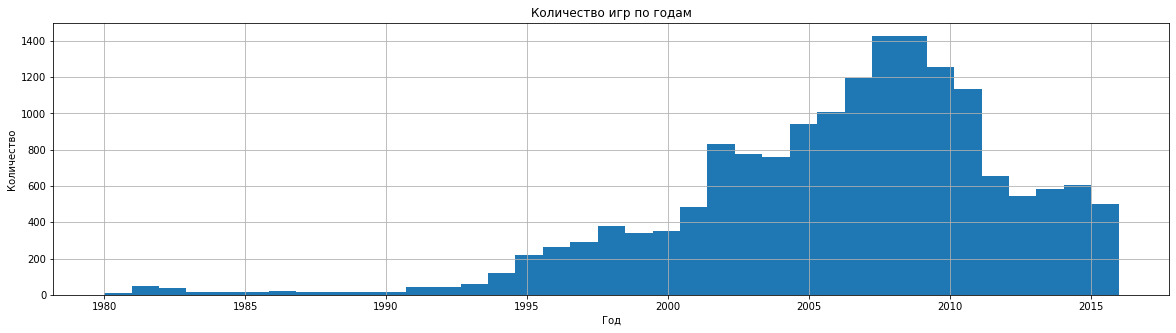

In [17]:
df.year_of_release.hist(bins=37,figsize=(20,5))
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

<span style='color:blue '>
    Судя по нашим данным, с 2007 по 2011 был золотой век, хотя точнее пятилетка, игровой индустрии.Хотя я думаю, это было скорее связанно с общей экономической ситуацией. Прилив поднимает все лодки, а в 2008 начался отлив. к 2011, похоже были законченны, так или иначе все проекты, начатые до 2008 года, и новые запускаются намного аккуратнее.
     </span>

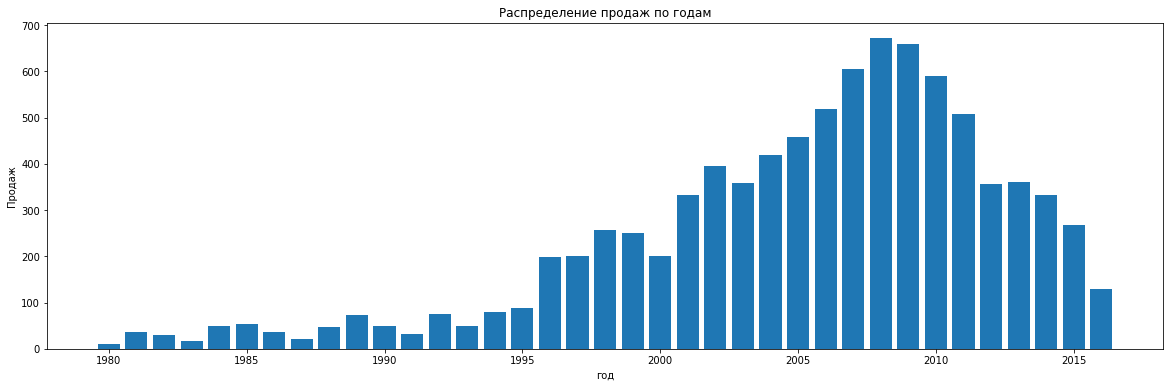

In [18]:
testdf=df.groupby('year_of_release')['total_sales'].sum()
fig, ax = plt.subplots()
ax.bar(testdf.index,height=testdf)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Распределение продаж по годам')
plt.xlabel('год')
plt.ylabel('Продаж')
plt.show()

<span style='color:blue '>
    Собственно ситуация с выручкой показывает то-же самое. Можно только обратить внимание на 2016 год, который по количеству провалился не сильно, а по сумме вдвое отличается от 2015. Это связанно с тем, что данные за 2016 год не полные, т.е. в выходе игра уже отметилась, а продажи только пошли.
     </span>

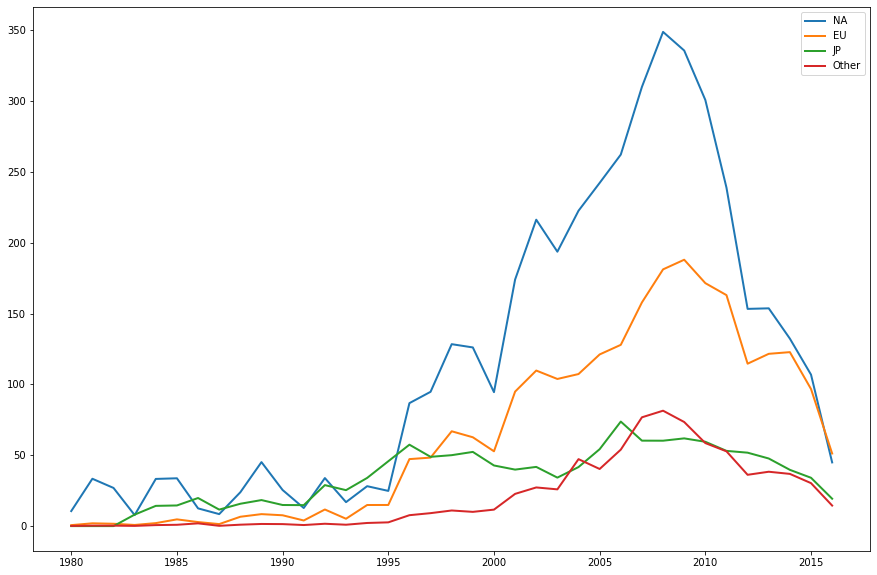

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
testdf=df.groupby('year_of_release')['na_sales'].sum()
ax.plot(testdf.index, testdf, label='NA', linewidth=2)
testdf=df.groupby('year_of_release')['eu_sales'].sum()
ax.plot(testdf.index, testdf, label='EU', linewidth=2)
testdf=df.groupby('year_of_release')['jp_sales'].sum()
ax.plot(testdf.index, testdf, label='JP', linewidth=2)
testdf=df.groupby('year_of_release')['other_sales'].sum()
ax.plot(testdf.index, testdf, label='Other', linewidth=2)
ax.legend()
plt.show()

<span style='color:blue '>
    Северная америка самая играющая страна, или самая богатая. Или там люди совсем не знаю про торренты. В Японии наиболее равномерный спрос, стабильность как она есть. Странно что остальной мир дает так мало, я так понимаю что данных по китаю нет совсем. Потому что очень странно, что 1.5 млрд китайцев совсем не играют? Возможно они дали больший вклад в мобильных платформах.
     </span>

### определение популярности в прошлом

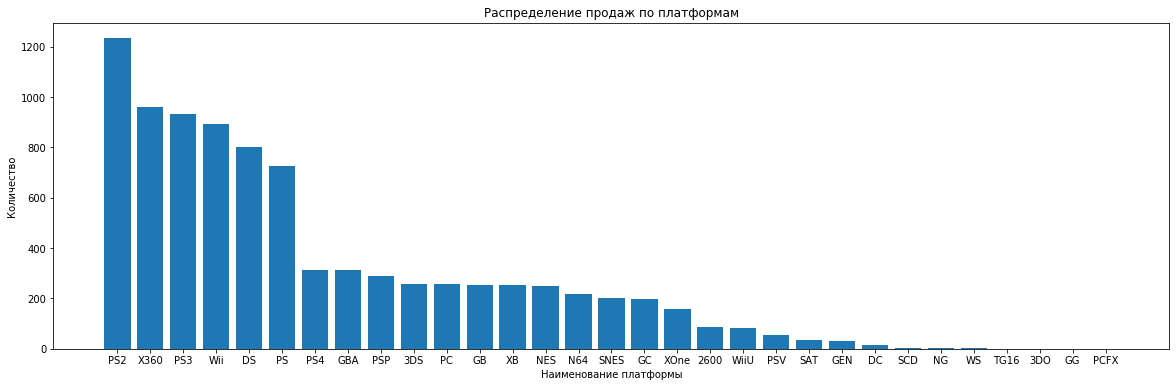

In [20]:
testdf=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots()
ax.bar(testdf.index,height=testdf)
fig.set_figwidth(20)  
fig.set_figheight(6)
plt.title('Распределение продаж по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество')
plt.show()

<span style='color:blue '>
    PS2 - легенда. Вот что значит выйти в нужное время, с нужными характеристиками и по адекватной цене. Компьютеры тогда совсем не тянули, и рынок был пуст - иди и захватывай. 
     </span>

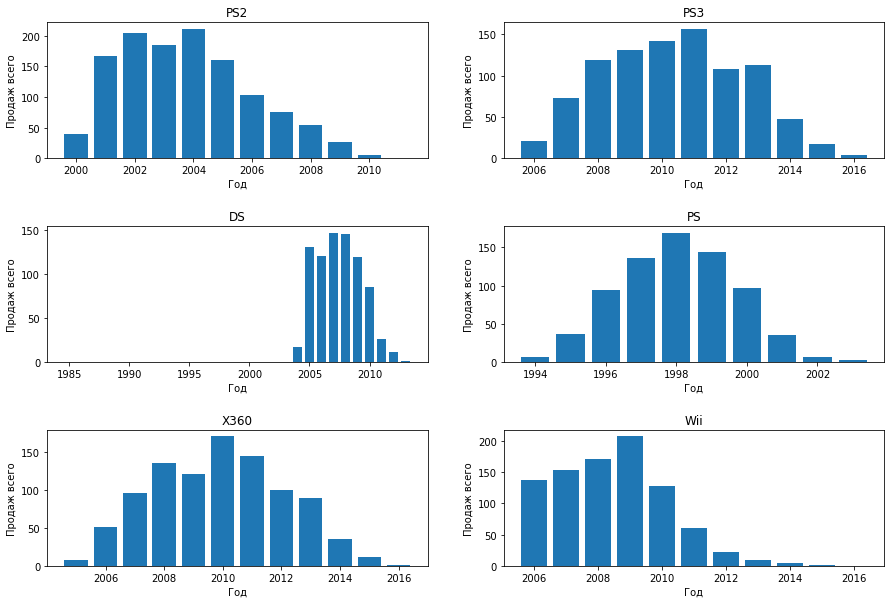

In [21]:
platform={'PS2','X360','PS3','Wii','DS','PS'}
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(15,10) )
plt.subplots_adjust(hspace=0.5)
i=0
j=0
for nm in platform:
    testdf=df[df.platform==nm].groupby('year_of_release')['total_sales'].sum()
    ax[i][j].bar(testdf.index,height=testdf)
    ax[i][j].set_xlabel('Год')
    ax[i][j].set_ylabel('Продаж всего')
    ax[i][j].set_title(nm)
    if j==0:
        j=j+1
    else:
        j=0
        i=i+1        
plt.show()

<span style='color:blue '>
    Среднее время жизни платформы - 10 лет. Выделяются только Nintendo Ds. Срок жизни составил 5 лет. Видимо нишевый продукт, карманная консоль, очень большая конкуренция в том числе и сотовыми телефонами. Да и экран небольшой. В 2004/2005 году вышла Sony PSP, с невероятными для того времени характеристиками, хотя по продажам игр DS впереди.
     </span>

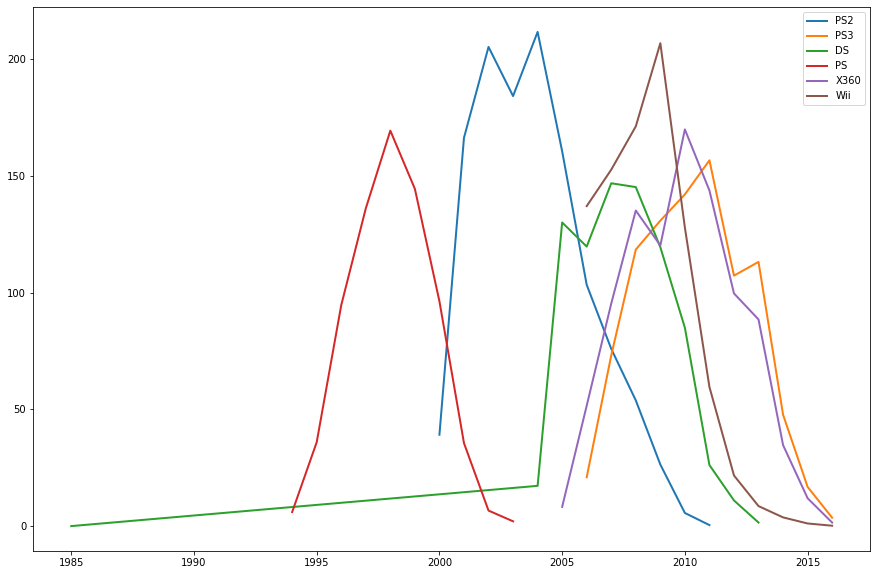

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
for nm in platform:
    testdf=df[df.platform==nm].groupby('year_of_release')['total_sales'].sum()
    ax.plot(testdf.index, testdf, label=nm, linewidth=2)
ax.legend()
plt.show()
    

<span style='color:blue '>
    Те же самые данные, только в виде линейных графиков на одном холсте.
     </span>

### определение перспективных платформ

<span style='color:blue '>
    <div>
    Нам нужно определить актуальный период, за который мы будем в дальнейшем рассматривать данные. И на основании которого мы будем делать рекомендации на будущее.
    </div>
    <div>
        На основании распределения выхода игр по годам и распределения выручки по годам (пункт 4.1) я принял решение взять данные с 2013 по 2015 годы включительно. Не хочу брать 2016, он не полный и до 2013 данные слишком оптимистичны. А за это период приемлимо плато.
    </div>
     </span>

In [23]:
ndf=df[(df.year_of_release>=2013) & (df.year_of_release<=2015)]
ndf=ndf.reset_index()

<span style='color:blue '>
Везде в дальнейшем используется датафрейм ndf, содержащий данные только с 2013 по 2015 годы, включительно
</span>

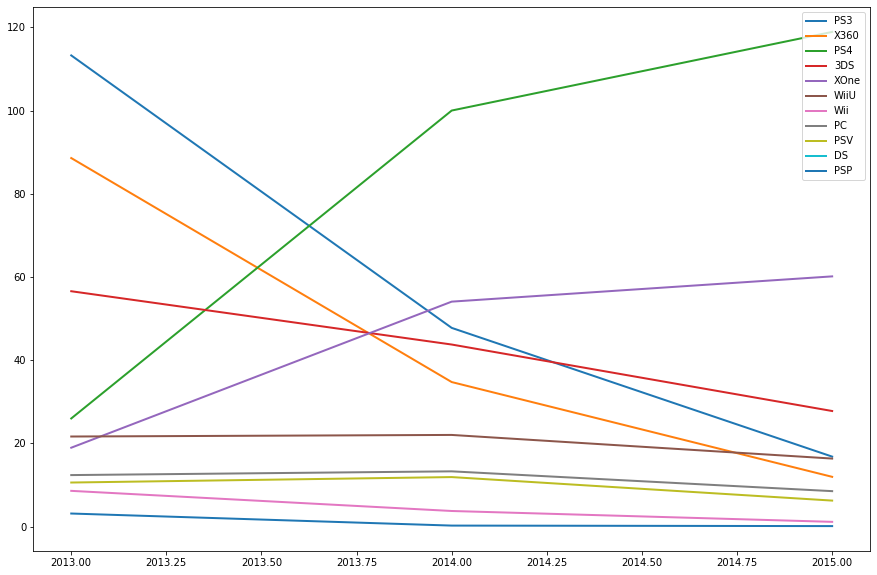

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
platform=ndf.platform.unique()
for nm in platform:
    testdf=ndf[ndf.platform==nm].groupby('year_of_release')['total_sales'].sum()
    ax.plot(testdf.index, testdf, label=nm, linewidth=2)
ax.legend()
plt.show()

<span style='color:blue '>
    Понятно, новые платформы PS4 и XboxOne идут вверх, остальные либо тянут лямку либо стагнируют. 
     </span>

### box plot

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


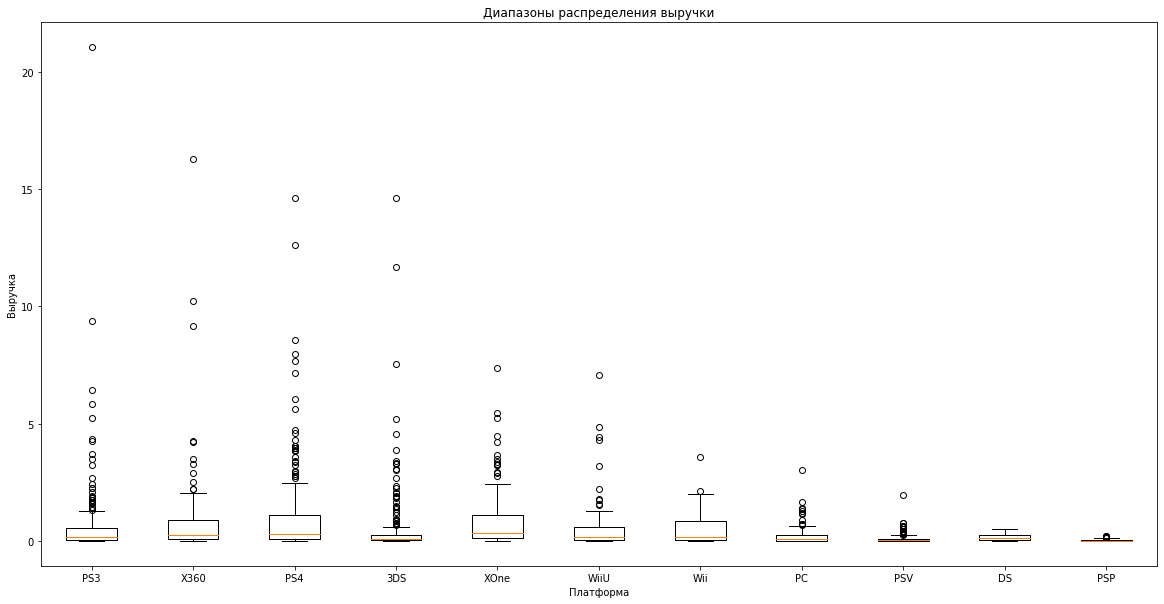

In [25]:
#testdf=ndf.groupby('platform')['total_sales']
data=[]

for nm in platform:
    testdf=ndf[ndf.platform==nm]['total_sales']
    #print(len(testdf))
    data.append(testdf)
    
data=np.asarray(data)

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.boxplot(data,labels=platform)
plt.title('Диапазоны распределения выручки')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.show()


<span style='color:blue '>
    Интересная картина, PSP и DS практически не имеют разброса, зарабатывают немного, но стабильно. Зато для консолей диапазон широчайший, от полного провала до невероятных взлетов. Интересно, что PC тоже довольно стабильная платформа.
     </span>

### корреляции

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa96efdb190>,
      dtype=object)

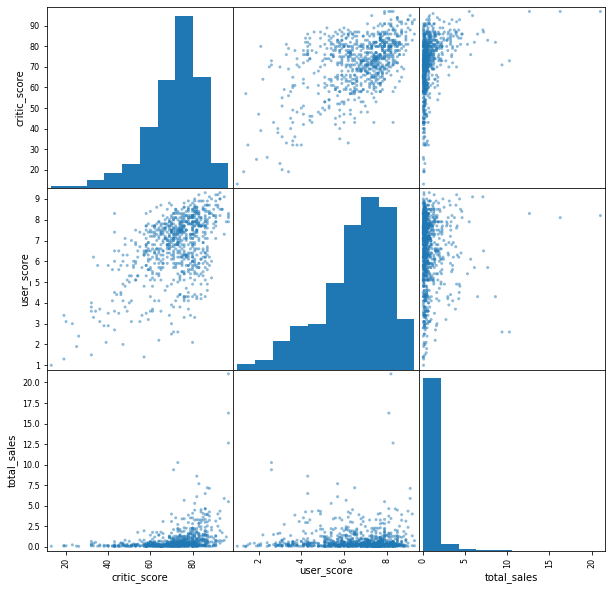

In [26]:
#testdf=ndf[ndf.platform=='PS4']
testdf=ndf.loc[:,['name','genre','critic_score','user_score','total_sales']]
pd.plotting.scatter_matrix(testdf, figsize=(10,10))

<span style='color:blue '>
    Как мы можем видеть, отзывы пользователей и критиков обладают большой корреляцией.
    Так же четко скоррелированны продажи с отзывами критиков. Причем все высокие продажи расположенны исключительно в области высоких оценок. Дорого игру, не получившую высокие отзывы не продаш.
    С пользовательскими оценками все чуть более размыто. Больше пользователей - больше мнений.
     </span>

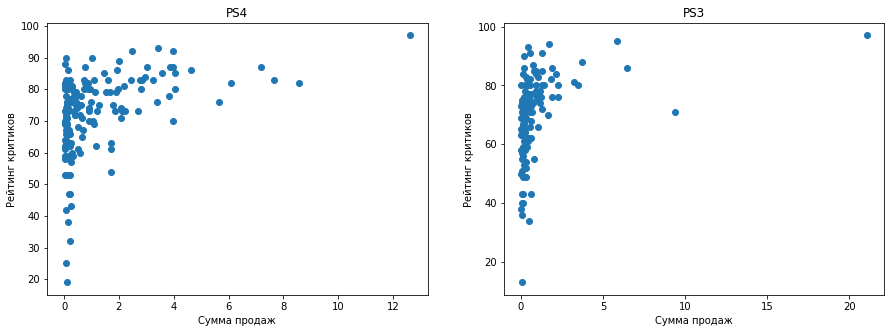

Коэффициент корреляции PS4 : 0.4318482049982005
Коэффициент корреляции PS3 : 0.3342853393371919


In [27]:
testdf1=ndf[ndf.platform=='PS4'].loc[:,['name','genre','critic_score','user_score','total_sales']]
testdf2=ndf[ndf.platform=='PS3'].loc[:,['name','genre','critic_score','user_score','total_sales']]

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,5) )
ax[0].scatter(x=testdf1.total_sales,y=testdf1.critic_score)
ax[0].set_title('PS4')
ax[0].set_xlabel('Сумма продаж')
ax[0].set_ylabel('Рейтинг критиков')
ax[1].scatter(x=testdf2.total_sales,y=testdf2.critic_score)
ax[1].set_title('PS3')
ax[1].set_xlabel('Сумма продаж')
ax[1].set_ylabel('Рейтинг критиков')
plt.show()
print('Коэффициент корреляции PS4 : {}'.format(testdf1.total_sales.corr(testdf1.critic_score)))
print('Коэффициент корреляции PS3 : {}'.format(testdf2.total_sales.corr(testdf2.critic_score)))

<span style='color:blue '>
    Как я и говорил, хорошие отзывы - хорошие продажи. 43% процента корреляция.
     </span>

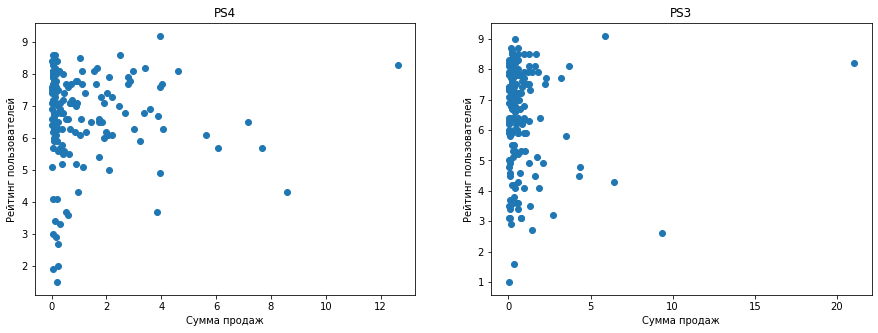

Коэффициент корреляции PS4 : 0.024230832360622553
Коэффициент корреляции PS3 : -0.01633272834351343


In [28]:
testdf1=ndf[ndf.platform=='PS4'].loc[:,['name','genre','critic_score','user_score','total_sales']]
testdf2=ndf[ndf.platform=='PS3'].loc[:,['name','genre','critic_score','user_score','total_sales']]

fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,5) )
ax[0].scatter(x=testdf1.total_sales,y=testdf1.user_score)
ax[0].set_title('PS4')
ax[0].set_xlabel('Сумма продаж')
ax[0].set_ylabel('Рейтинг пользователей')
ax[1].scatter(x=testdf2.total_sales,y=testdf2.user_score)
ax[1].set_title('PS3')
ax[1].set_xlabel('Сумма продаж')
ax[1].set_ylabel('Рейтинг пользователей')
plt.show()
print('Коэффициент корреляции PS4 : {}'.format(testdf1.total_sales.corr(testdf1.user_score)))
print('Коэффициент корреляции PS3 : {}'.format(testdf2.total_sales.corr(testdf2.user_score)))

<span style='color:blue '>
    А вот пользователи не так единодушны. Видимо они не учитывают мнение других пользователей, когда высказывают свое. В отличии от профессиональных критиков, которые никогда не пойдут против мнения сообщества критиков. Неплохие продажи имели игры даже с рейтингом 3. Видимо у пользователей свои критерии оценки.
     </span>

### продажи по жанрам

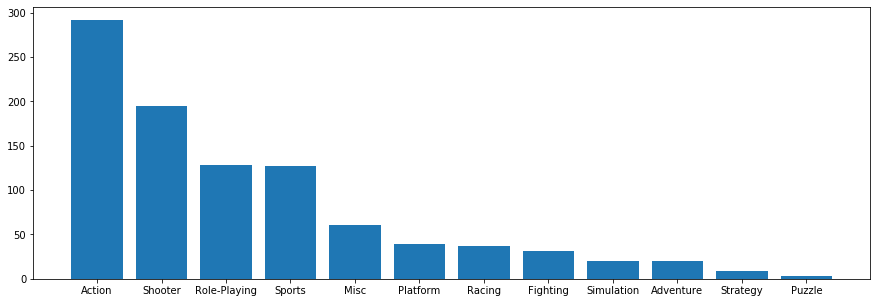

In [29]:

testdf=ndf.groupby('genre').total_sales.sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(testdf.index, testdf)   
plt.show()

<span style='color:blue '>
    Если сложить Action и Shooter (категории близкие) то на их фоне все остальные жанры просто потеряются. Вот и доказывай после этого, что компьютерные игры развивают, а не тупые стрелялки. 
     </span>

## портрет пользователя

### популярные платформы

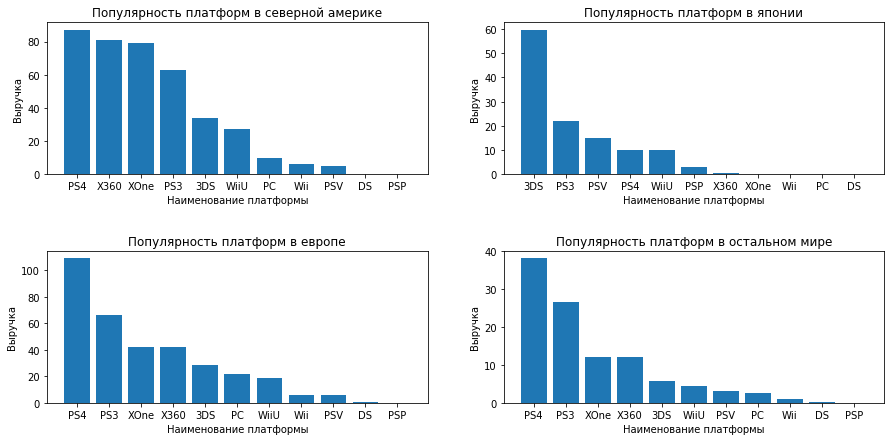

In [30]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,7) )
plt.subplots_adjust(hspace=0.5)

testdf=ndf.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
ax[0][0].bar(testdf.index,height=testdf)
ax[0][0].set_title('Популярность платформ в северной америке')
ax[0][0].set_xlabel('Наименование платформы')
ax[0][0].set_ylabel('Выручка')


testdf=ndf.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
ax[0][1].bar(testdf.index,height=testdf)
ax[0][1].set_title('Популярность платформ в японии')
ax[0][1].set_xlabel('Наименование платформы')
ax[0][1].set_ylabel('Выручка')


testdf=ndf.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
ax[1][0].bar(testdf.index,height=testdf)
ax[1][0].set_title('Популярность платформ в европе')
ax[1][0].set_xlabel('Наименование платформы')
ax[1][0].set_ylabel('Выручка')



testdf=ndf.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
ax[1][1].bar(testdf.index,height=testdf)
ax[1][1].set_title('Популярность платформ в остальном мире')
ax[1][1].set_xlabel('Наименование платформы')
ax[1][1].set_ylabel('Выручка')

plt.show()

<span style='color:blue '>
    Честно сказать, для меня стало шоком, что рынок PC игр в такой, скажем так, далеко от топовых позиций. Видимо пиратство делает свое благородное дело. В то время как на консолях запускать не лицензионные игры сопряженно с некоторыми сложностями. И японцы похоже дома не живут. 3DS кроет всех остальных вместе взятых.
     </span>

### популярные жанры

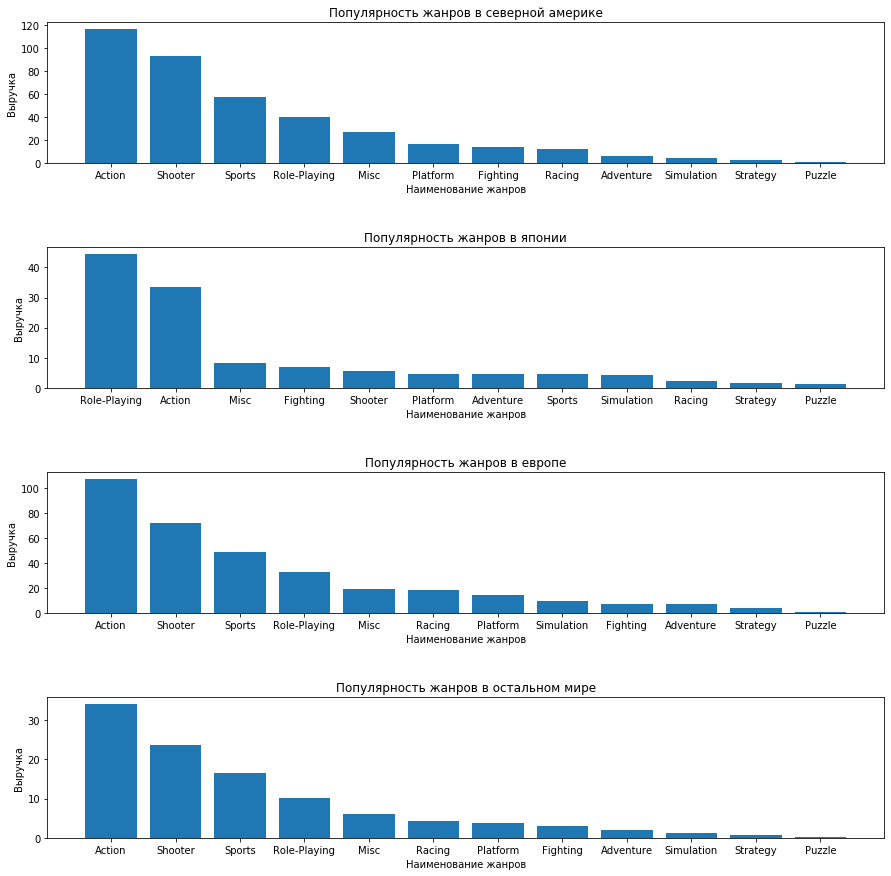

In [31]:
fig, ax = plt.subplots(ncols=1,nrows=4,figsize=(15,15) )
plt.subplots_adjust(hspace=0.6)

testdf=ndf.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
ax[0].bar(testdf.index,height=testdf)
ax[0].set_title('Популярность жанров в северной америке')
ax[0].set_xlabel('Наименование жанров')
ax[0].set_ylabel('Выручка')


testdf=ndf.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
ax[1].bar(testdf.index,height=testdf)
ax[1].set_title('Популярность жанров в японии')
ax[1].set_xlabel('Наименование жанров')
ax[1].set_ylabel('Выручка')


testdf=ndf.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
ax[2].bar(testdf.index,height=testdf)
ax[2].set_title('Популярность жанров в европе')
ax[2].set_xlabel('Наименование жанров')
ax[2].set_ylabel('Выручка')



testdf=ndf.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
ax[3].bar(testdf.index,height=testdf)
ax[3].set_title('Популярность жанров в остальном мире')
ax[3].set_xlabel('Наименование жанров')
ax[3].set_ylabel('Выручка')

plt.show()

<span style='color:blue '>
    Тут тоже ничего необычного. Северная америка, европа и остальной  мир, дома на дорогих консолях играют в стрелялки. Японцы на карманных 3DS играют в пошаговые RPG. Может даже 18+
     </span>

### влияние рейтинга

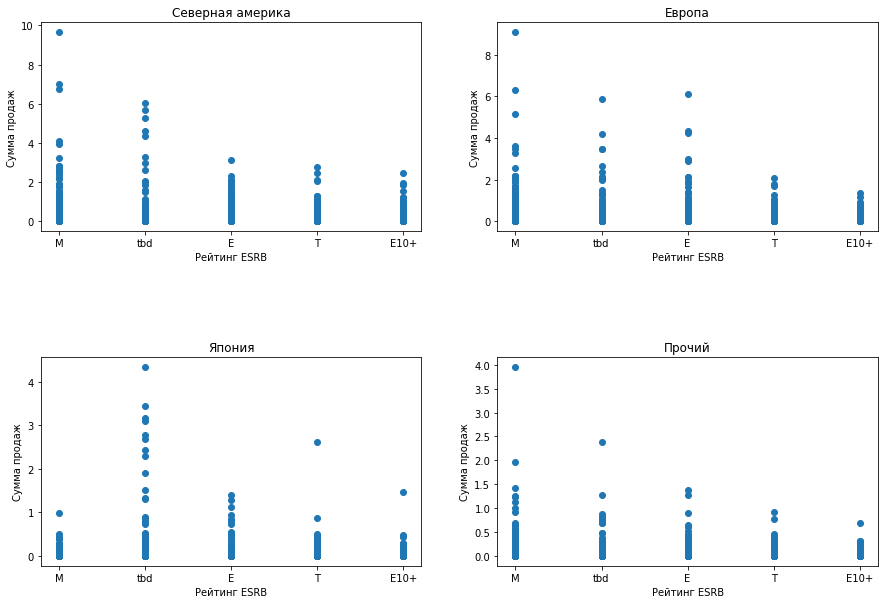

In [32]:
# заменить nan на tbd

fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(15,10) )
plt.subplots_adjust(hspace=0.6)

testdf=ndf.loc[:,['name','genre','na_sales','rating','eu_sales','jp_sales','other_sales']]
testdf.rating=testdf.rating.fillna('tbd')



ax[0][0].scatter(y=testdf.na_sales,x=testdf.rating)
ax[0][0].set_title('Северная америка')
ax[0][0].set_xlabel('Рейтинг ESRB')
ax[0][0].set_ylabel('Сумма продаж')

ax[0][1].scatter(y=testdf.eu_sales,x=testdf.rating)
ax[0][1].set_title('Европа')
ax[0][1].set_xlabel('Рейтинг ESRB')
ax[0][1].set_ylabel('Сумма продаж')

ax[1][0].scatter(y=testdf.jp_sales,x=testdf.rating)
ax[1][0].set_title('Япония')
ax[1][0].set_xlabel('Рейтинг ESRB')
ax[1][0].set_ylabel('Сумма продаж')

ax[1][1].scatter(y=testdf.other_sales,x=testdf.rating)
ax[1][1].set_title('Прочий')
ax[1][1].set_xlabel('Рейтинг ESRB')
ax[1][1].set_ylabel('Сумма продаж')
plt.show()




<span style='color:blue '>
    Для северной америки, европы и прочих основной рейтинг М. Потому что основной жанр Action и Shooter, а там нифига не цветочки собирают. Судя по рейтингам японии, на своих карманных консолях играют в симуляторы свиданий для подростков, совсем мало М и большой Т. А вот европейцы явно играю в развивающие игры для детей, большой Е.
     </span>

## Проверка гипотез

### гипотеза 1

Нулевая гипотеза:
 Средние пользовательские рейтинги платформ XboX One и PC одинаковые
 
Альтернативная гипотеза:
 Средние пользовательские рейтинги платформ XboX One и PC не одинаковые

In [33]:
dfX=ndf[ndf.platform=='XOne'].user_score
dfX=dfX.dropna()
dfP=ndf[ndf.platform=='PC'].user_score
dfP=dfP.dropna()
result=st.ttest_ind(dfX,dfP)
print(result)

Ttest_indResult(statistic=1.076751678005444, pvalue=0.2827494983260732)


<span style='color:blue '>
    С вероятностью 28% нулевая гипотеза подтверждена. Рейтинги платформ XboX One и PC одинаковые.
     </span>

### гипотеза 2

Нулевая гипотеза:
 Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза:
 Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [34]:
dfX=ndf[ndf.genre=='Action'].user_score
dfX=dfX.dropna()
dfP=ndf[ndf.genre=='Sports'].user_score
dfP=dfP.dropna()
result=st.ttest_ind(dfX,dfP)
print(result)

Ttest_indResult(statistic=11.31018859674032, pvalue=4.157989291674154e-26)


<span style='color:blue '>
    Тут нулевая гипотеза однозначно отвергается. Что собственно и не удивительно, жанры Action и Sports сильно разные.
     </span>

## заключение

<span style='color:blue '>
    В качестве рекомендаций на будущий период можно сказать следующее:
    
    Для рынков северной америки, европы и остального мира
    1. Очевидно, что будет возрастать спрос на игры для новых консолей, недавно вышедших на рынок: PS4 и Xbox.
    2. Жанры Action и Shooter - вне конкуренции.
    3. Основная категория игроков М по спецификации ESRB.
    
    Для рынков японии
    1. наиболее популярной платформой остается 3DS
    2. основной жанр - RPG
    3. возрастные группы Т и Е10
    
    Но в то-же время рынок игр для PC демонстрирует неплохую стабильность. Хотя в целом он меньше, чем рынок игр для консолей, но на нем нет и особых провалов. Успех на консоли будет иметь либо какой-то эксклюзив, либо что-то, что получит высокие рейтинги критиков. В то время как PC бояре жрут практически все, только благодаря пиратству платить не хотят.
    
    Так же необходимо отметить нарастающую популярность сотовых платформ, хотя они и предоставленны в нащих данных. Но их основная сложность,что продавец игр один и монопольный. Большинство игр бесплатны и монетизация осуществляется внутри игры, т.е. мы с этого денег не получим.
   